# SMART MOBILE PHONE PRICE PREDICTION

# INTRODUCTION

# In this scenario, the objective is not to predict the exact price, but rather to provide a price range that indicates the relative highness of the price.

# 0: Low Cost (Under 10k)
# 1: Medium CostBetween (Between 10k-30k)
# 2: High Cost(Between 30K-50k)
# 3: Very High Cost(Above 50k)
# In this project, the evaluation metric used for classification is the F1 score. To interpret the F1 score, it is recommended to follow a general rule of thumb:

# 0.9 - 1.0 : Very Good
# 0.8 - 0.9 : Good
# 0.5 - 0.8 : OK
# Below 0.5 : Not Good

In [2]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [6]:
df.shape

(2000, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

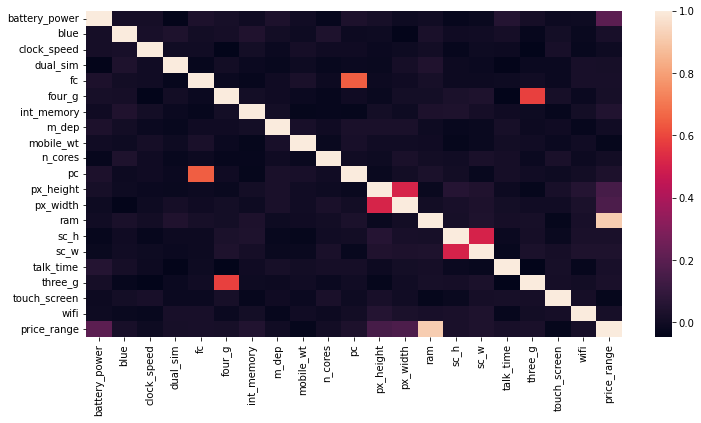

In [8]:
plt.figure(figsize= (12, 6))
sns.heatmap(df.corr())
plt.show()

In [9]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
df_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [11]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [12]:
df_test.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [13]:
df.duplicated().sum()

0

In [14]:
df_test.duplicated().sum()

0

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [16]:
print ("There are {} rows in the train dataset and {} rows in the test dataset".format(
    df.shape[0],df_test.shape[0]))

There are 2000 rows in the train dataset and 1000 rows in the test dataset


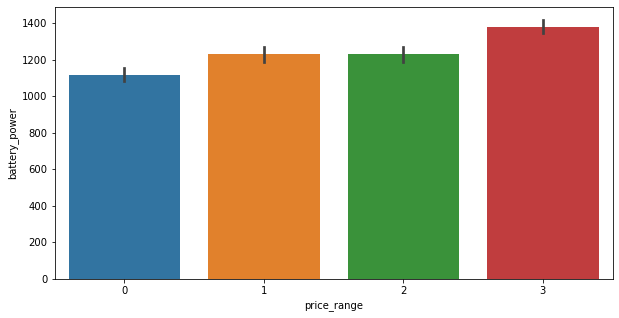

In [17]:
#PLOTTING RELATIONSHIP BETWEEN PRICE RANGE AND BATTERY POWER BASED ON TRAINING DATASET
plt.figure(figsize = (10, 5))
sns.barplot(x = 'price_range', y = 'battery_power', data = df)
plt.show()

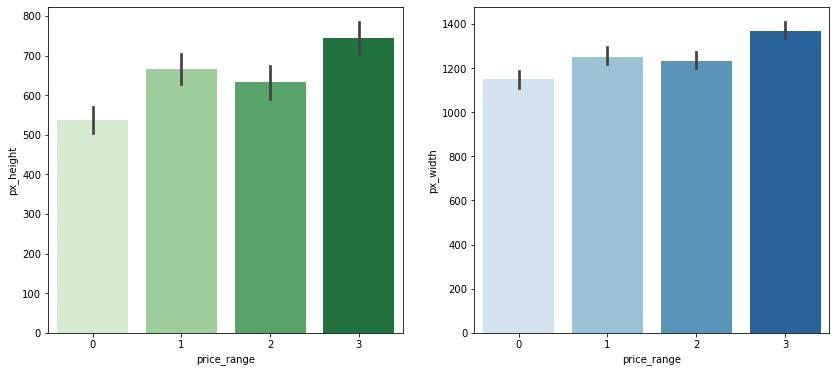

In [18]:
# PLOTTING RELATIONSHIP BETWEEN PRICE RANGE AND PIXEL HEIGHT AND WIDTH
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.barplot(x = 'price_range', y = 'px_height', data=df, palette='Greens')
plt.subplot(1,2,2)
sns.barplot(x = 'price_range', y = 'px_width', data=df, palette='Blues')
plt.show()

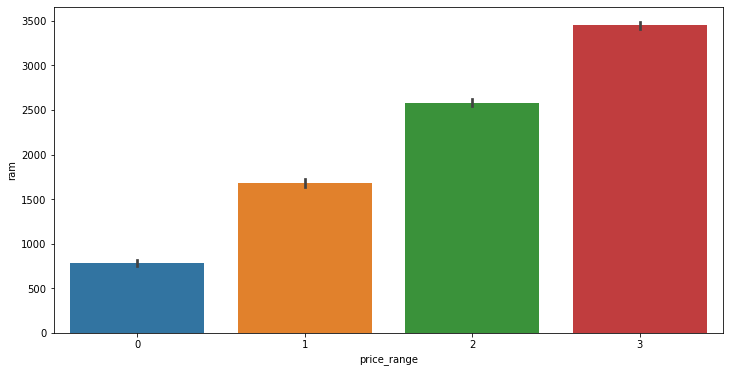

In [19]:
#PLOTTING RELATION BETWEEN PRICE RANGE & RAM
plt.figure(figsize = (12, 6))
sns.barplot(x = 'price_range', y = 'ram', data=df)
plt.show()

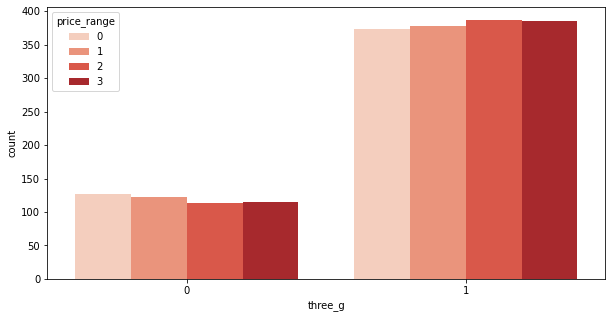

In [20]:
# REALTION BETWEEN PRICE RANGE AND 3G/4G
plt.figure(figsize = (10, 5))
sns.countplot(df['three_g'] , hue = df['price_range'], palette = 'Reds')
plt.show()

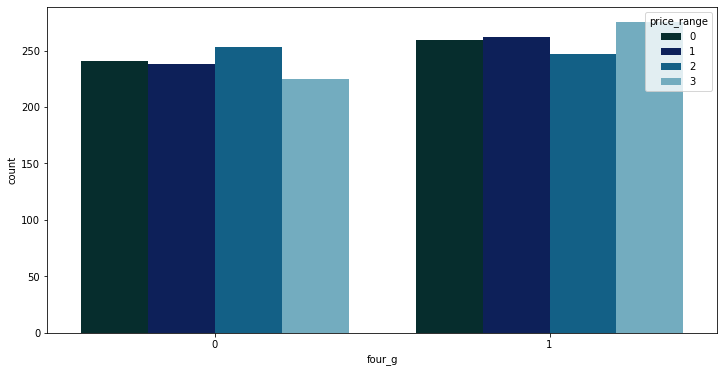

In [21]:
#FOR 4G
plt.figure(figsize = (12, 6))
sns.countplot(df['four_g'], hue = df['price_range'], palette = 'ocean')
plt.show()

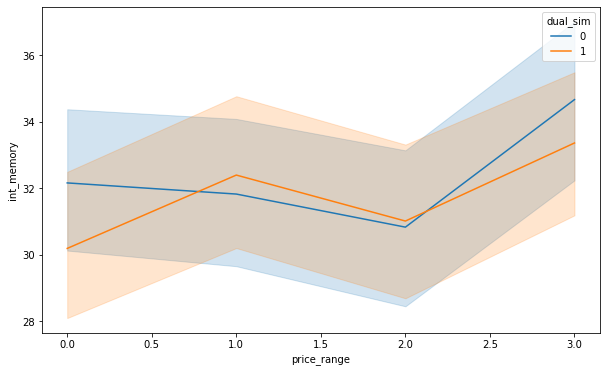

In [22]:
# REALTIONSHIP BETWEEN PRICE RANGE AND MEMORY
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'price_range', y = 'int_memory', data = df, hue = 'dual_sim')
plt.show()

# Data Preprocessing

In [23]:
X = df.drop(['price_range'],1)
y = df['price_range']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Modelling & Evaluation

In [24]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

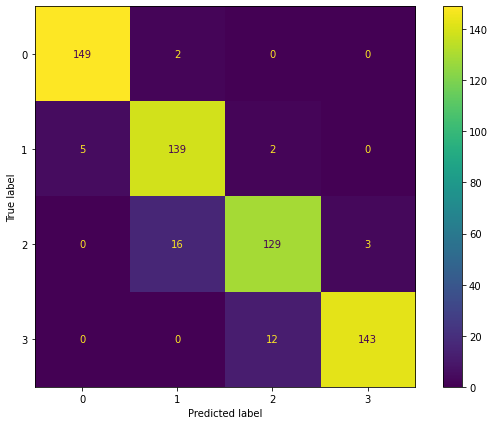

In [25]:
fig,ax = plt.subplots(figsize=(10,7))
plot_confusion_matrix(knn, X_test, y_test,ax=ax)
plt.show()


In [26]:
score = f1_score(y_test,y_pred, average = 'weighted')
model = 'KNightborsClassifier'
print ("The f1score for {} is {:.2f}".format(model,score))

The f1score for KNightborsClassifier is 0.93


In [28]:
knn.score(X_train, y_train)

0.9535714285714286

In [29]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred2 = tree.predict(X_test)

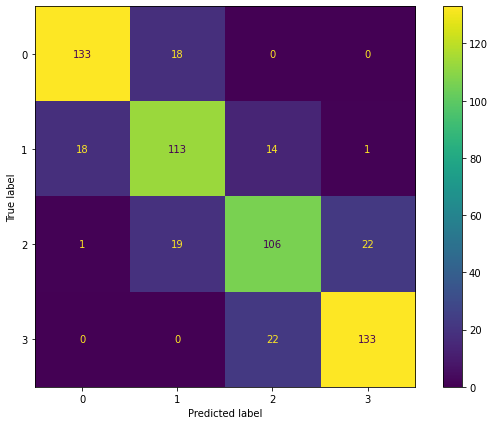

In [30]:
fig,ax = plt.subplots(figsize=(10,7))
plot_confusion_matrix(tree, X_test, y_test,ax=ax)
plt.show()

In [31]:
score = f1_score(y_test,y_pred2, average = 'weighted')
model = 'DecisionTreeClassifier'
print ("The f1score for {} is {:.2f}".format(model,score))

The f1score for DecisionTreeClassifier is 0.81


In [32]:
ensemble = RandomForestClassifier()
ensemble.fit(X_train,y_train)
y_pred3 = ensemble.predict(X_test)

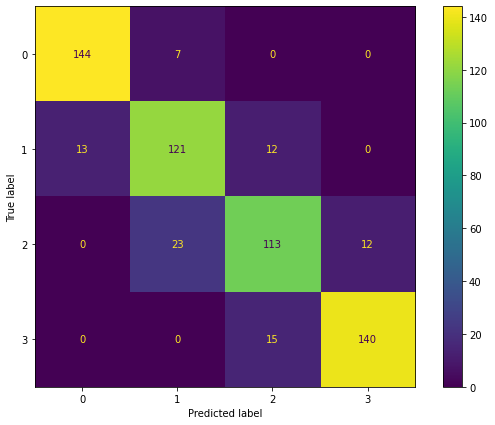

In [33]:
fig,ax = plt.subplots(figsize=(10,7))
plot_confusion_matrix(ensemble, X_test, y_test,ax=ax)
plt.show()

In [34]:
score = f1_score(y_test,y_pred3, average = 'weighted')
model = 'RandomForestClassifier'
print ("The f1score for {} is {:.2f}".format(model,score))

The f1score for RandomForestClassifier is 0.86


In [37]:
X_test = df_test.drop(['id'],1)
price_range_test = knn.predict(X_test)

In [39]:
prediction = pd.DataFrame(price_range_test,index=df_test.id, columns = ['price_range'])
prediction.to_csv("Price_Range_Test.csv")

# MODEL DEPLOYMENT

In [40]:
import pickle
pickle.dump(knn, open('model.pkl', 'wb'))